In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import predict
sns.set(style="ticks")

In [4]:
GENRES = ['classical', 'country', 'edm', 'hip-hop', 'jazz', 'pop', 'rap', 'rnb', 'rock']

In [5]:
model = pickle.load(open("model.pkl", "rb"))

Getting 50 duplicate tracks

In [6]:
all_tracks = pd.DataFrame()
for genre in GENRES:
    genre = pd.read_pickle(f"../data/spotify_dataset_{genre}.pkl")
    all_tracks = pd.concat([all_tracks, genre])

all_dupes = all_tracks[all_tracks.index.duplicated(keep=False)]
dupes_samples = all_dupes.sample(n=50)

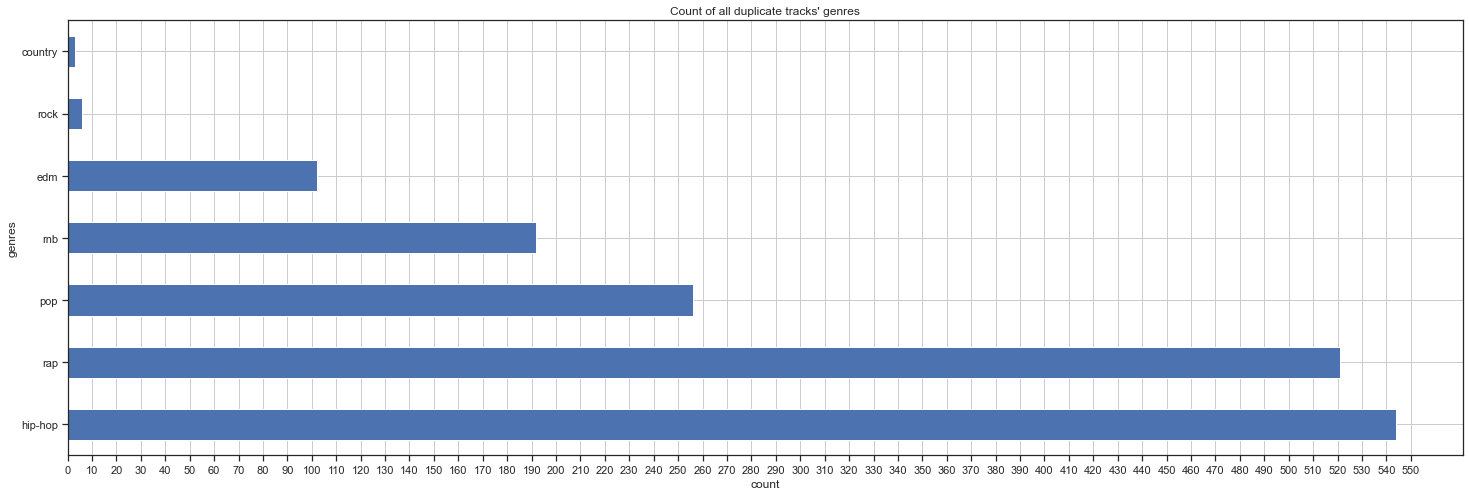

In [7]:
genre_counts_duplicates = all_dupes['genre'].value_counts().plot(x='genre', y='count', kind='barh', figsize=(25,8), grid=True);
plt.title("Count of all duplicate tracks' genres")
plt.xlabel("count")
plt.ylabel("genres")
plt.xticks(np.arange(0, 551, step=10));

,artists,name,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0p1BcEcYVO3uk4KDf3gzkY,[Hunter Hayes],Wanted,country,0.421,0.476,0,-7.692,1,0.0298,0.2680,0.000000,0.0816,0.300,169.784,228840,4
4j5ffIFh7bFT7GZciP1TCy,"[Dan + Shay, Justin Bieber]","10,000 Hours (with Justin Bieber)",country,0.654,0.630,10,-4.644,1,0.0259,0.1490,0.000000,0.1110,0.430,89.991,167693,4
6OcCk1dbAb7XNHsC098oEM,"[Kelsea Ballerini, LANY]",I Quit Drinking,country,0.607,0.418,1,-6.997,1,0.0363,0.3940,0.000000,0.1820,0.386,95.002,171200,4
5aMOyzlybtTICvD6XRGctm,"[DVBBS, Borgeous]",Tsunami - Original Mix,edm,0.699,0.839,4,-5.353,0,0.0481,0.0483,0.655000,0.0897,0.264,128.026,236707,4
7BxIvkfVSgoUUlDcBVff61,"[Dillon Francis, Aleyna Tilki]",Real Love (feat. Aleyna Tilki),edm,0.738,0.793,10,-4.313,0,0.0685,0.0496,0.000085,0.0522,0.555,124.012,135266,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0fYVliAYKHuPmECRs1pbRf,[X Ambassadors],Renegades,rock,0.526,0.862,2,-6.003,1,0.0905,0.0144,0.059700,0.2290,0.528,90.052,195200,4
5v4OkFH0TJ6W1hCFxyn0px,[YUNGBLUD],parents,rock,0.612,0.824,7,-4.758,1,0.0478,0.0130,0.000000,0.2880,0.586,82.017,171880,4
5Hroj5K7vLpIG4FNCRIjbP,[American Authors],Best Day Of My Life,rock,0.673,0.902,2,-2.392,1,0.0346,0.0591,0.000262,0.0558,0.538,100.012,194240,4
1qwno7xb5mJe71xtMS6jl2,[K.Flay],High Enough,rock,0.606,0.620,0,-5.005,1,0.0298,0.0301,0.091600,0.1670,0.543,88.984,231600,4


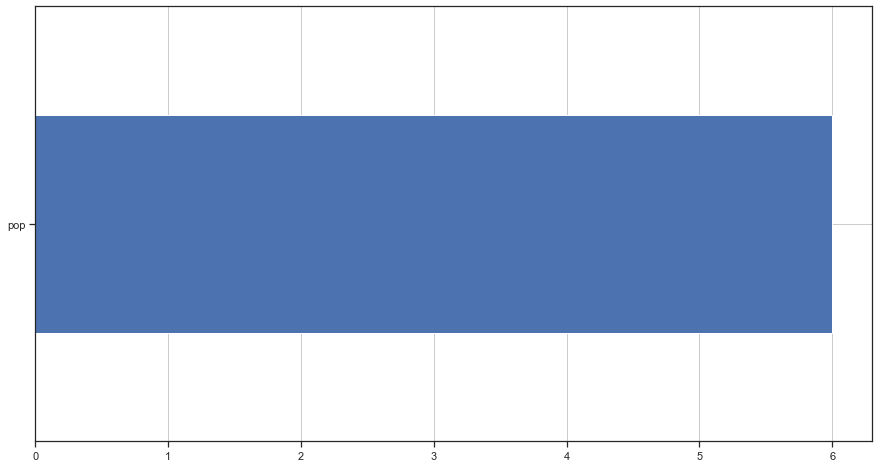

In [8]:
d = all_tracks[all_tracks.index.duplicated(keep=False)]
rd = d[d['genre'] == 'rock'].index

rdg = all_tracks.loc[rd]
rdg[rdg['genre'] != 'rock']['genre'].value_counts().plot(x='genre', y='count', kind='barh', figsize=(15,8), grid=True);

# rdg[rdg['genre'] != 'pop']
rdg[rdg['genre'] != 'rock']['genre'].value_counts()
d

Getting 50 single-label songs per genre

In [9]:
all_non_dupes = all_tracks[~all_tracks.index.duplicated()]
non_dupes_samples = pd.DataFrame()
for genre in GENRES:
    non_dupes_samples = pd.concat([non_dupes_samples, all_non_dupes[all_non_dupes['genre'] == genre].sample(n=50)])

In [10]:
non_dupes_samples

,artists,name,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
2OWzoQiL6VDTczQwBxmWVx,"[György Ligeti, Jonathan Nott, Berliner Philha...",Ligeti : Requiem : II Kyrie,classical,0.061,0.20700,7,-19.225,0,0.0437,0.986000,0.918000,0.1080,0.0268,67.312,395027,4
7C5egNfLY7qELLhPnQIFtP,"[Giovanni Pierluigi da Palestrina, Sistine Cha...",Missa Papae Marcelli: I. Kyrie,classical,0.165,0.16900,9,-25.429,1,0.0398,0.992000,0.937000,0.0908,0.1080,129.561,213093,5
5EkbgoNhM0lhIxweM8QwNq,"[Luigi Boccherini, Lazar Gosman]","String Quintet in E Major, Op. 13, No. 5: III....",classical,0.498,0.07890,9,-22.491,1,0.0323,0.926000,0.514000,0.2360,0.6130,99.211,203000,4
4XmDMXQ9gsTACwgi3yZN9a,"[Girolamo Frescobaldi, Bruno Cocset, Les Basse...","Canzona vigesimaquarta a due bassi e canto ""de...",classical,0.230,0.16100,9,-18.792,0,0.0407,0.821000,0.034800,0.1040,0.4690,151.180,191253,3
3lc50klE0jAl24Z4p2crgL,"[Modest Mussorgsky, Alfred Brendel]",Pictures at an Exhibition: The Old Castle. And...,classical,0.444,0.00274,1,-33.798,0,0.0560,0.992000,0.919000,0.1020,0.2460,137.539,297573,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6E6uwOhAEHSzSvDewOBEvF,[Night Ranger],Don't Tell Me You Love Me,rock,0.389,0.84000,6,-10.015,0,0.0442,0.039300,0.001550,0.0850,0.4930,176.589,262827,4
1pTw2cNrp9L3esxLAvWnN2,[Journey],Separate Ways (Worlds Apart),rock,0.467,0.94300,0,-5.626,1,0.0576,0.018900,0.000005,0.2160,0.4530,131.536,323667,4
6CqYhhUPJORx1vvdTNc8jv,[A Perfect Circle],The Outsider,rock,0.328,0.84300,6,-6.644,1,0.0887,0.000111,0.801000,0.0496,0.4220,113.329,246000,4
6MrILERJLA3Jcq0E9poZsp,[Harry Nilsson],Without You,rock,0.381,0.18600,4,-15.477,1,0.0290,0.613000,0.000003,0.0694,0.1420,65.058,201000,4
